In [41]:
%run init_notebook.py
% matplotlib inline

from math import ceil, sqrt
import numpy as np

from ia_mri_tools.signal_stats import signal_likelihood
from ia_mri_tools.filters import radial, gradient, hessian
from ia_mri_tools.signal_stats import signal_stats, noise_stats
from ia_mri_tools.features import textures

In [35]:
# Load the t1 data for a single slice
t1 = load_data('T1', z=120)
t2 = load_data('T2', z=120)

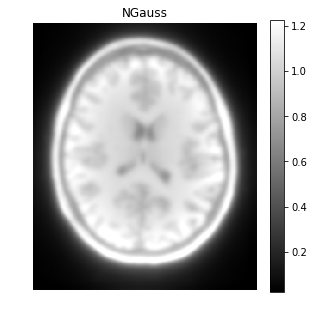

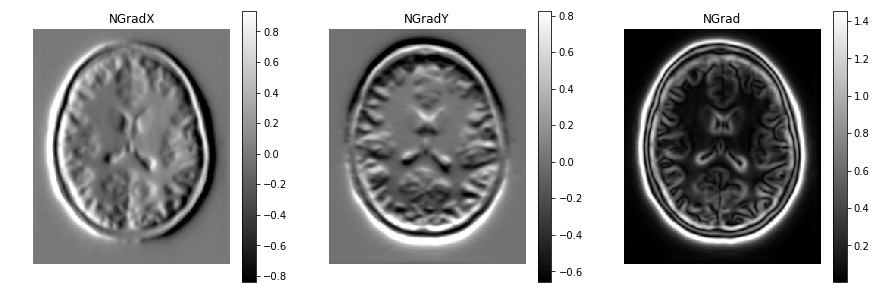

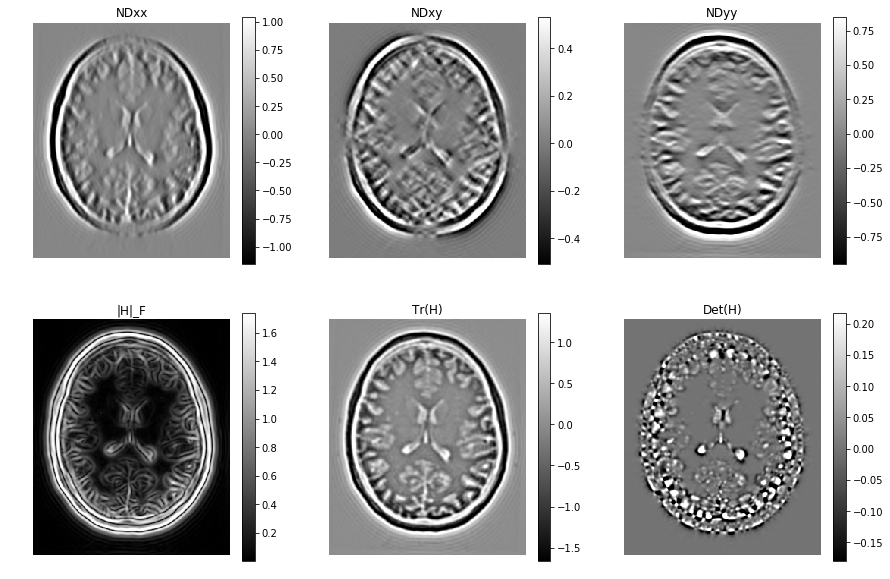

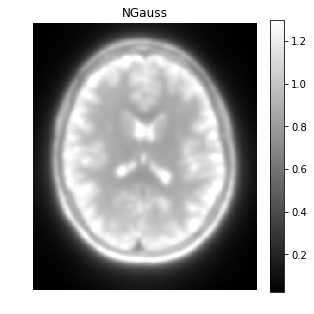

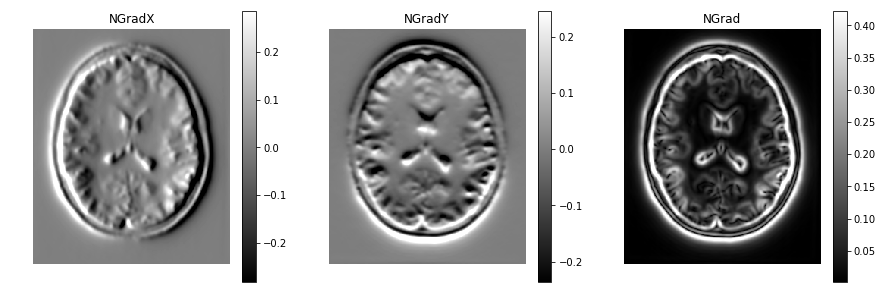

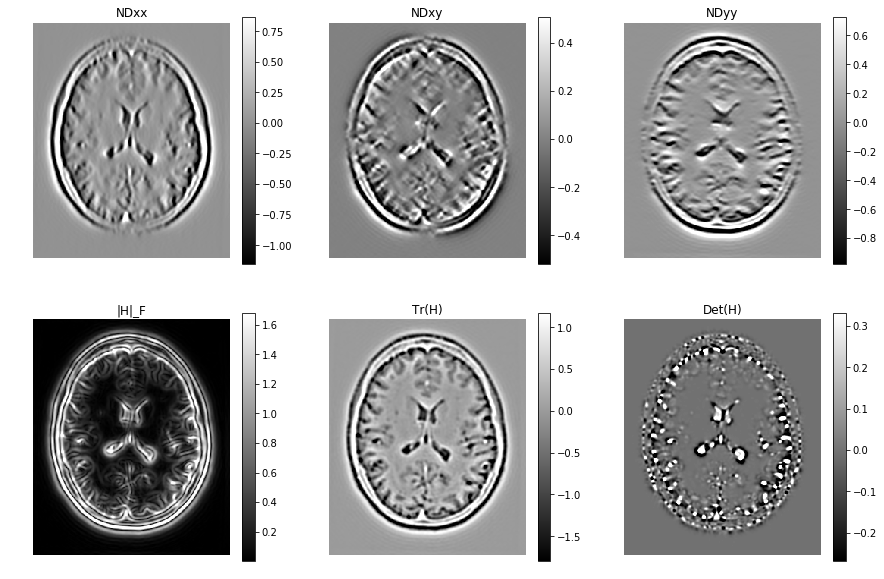

In [36]:
def pinv(x, lam=3):
    _, q, _ = noise_stats(np.abs(x))
    ix = x / (np.abs(x)**2 + lam**2*q**2)
    return ix

scale = 3
smax = 4
for f in (t1, t2):

    # Gaussian
    gauss = radial(f, 'gaussian', scale=scale)    
    ngauss = gauss * np.sqrt(pinv(radial(np.abs(gauss)**2, 'gaussian', scale=smax)))
    plt.figure(figsize=[5,5])
    im_show_scale(ngauss,  1,1,1, title='NGauss')

    # Gradient
    grad = gradient(f, scale=scale)
    grad_pow = grad[0]**2 + grad[1]**2
    grad_mag = np.sqrt(grad_pow)
    grad_scale = np.sqrt(pinv(radial(grad_pow, 'gaussian', scale=smax)))
    plt.figure(figsize=[15,5])
    im_show_scale(grad[0]*cscale,  1,3,1, title='NGradX')
    im_show_scale(grad[1]*cscale,  1,3,2, title='NGradY')
    im_show_scale(grad_mag*cscale, 1,3,3, title='NGrad')    

    # Hessian
    # in 2D c1 = dxx + dyy, c2 = dxx*dyy - dxy*dxy
    hess = hessian(f, scale=scale)
    C1 = hess[0] + hess[2]
    C2 = hess[0]*hess[2] - hess[1]*hess[1]
    hess_pow = np.abs(hess[0])**2 + 2*np.abs(hess[1])**2 + np.abs(hess[2])**2
    cscale = np.sqrt(pinv(radial(hess_pow, 'gaussian', scale=smax)))

    plt.figure(figsize=[15,10])
    im_show_scale(hess[0]*cscale, 2,3,1, title='NDxx')
    im_show_scale(hess[1]*cscale, 2,3,2, title='NDxy')
    im_show_scale(hess[2]*cscale, 2,3,3, title='NDyy')
    im_show_scale(np.sqrt(hess_pow)*cscale, 2,3,4, title='|H|_F')
    im_show_scale(C1*cscale, 2,3,5, title='Tr(H)')
    im_show_scale(C2*cscale**2, 2,3,6, title='Det(H)')


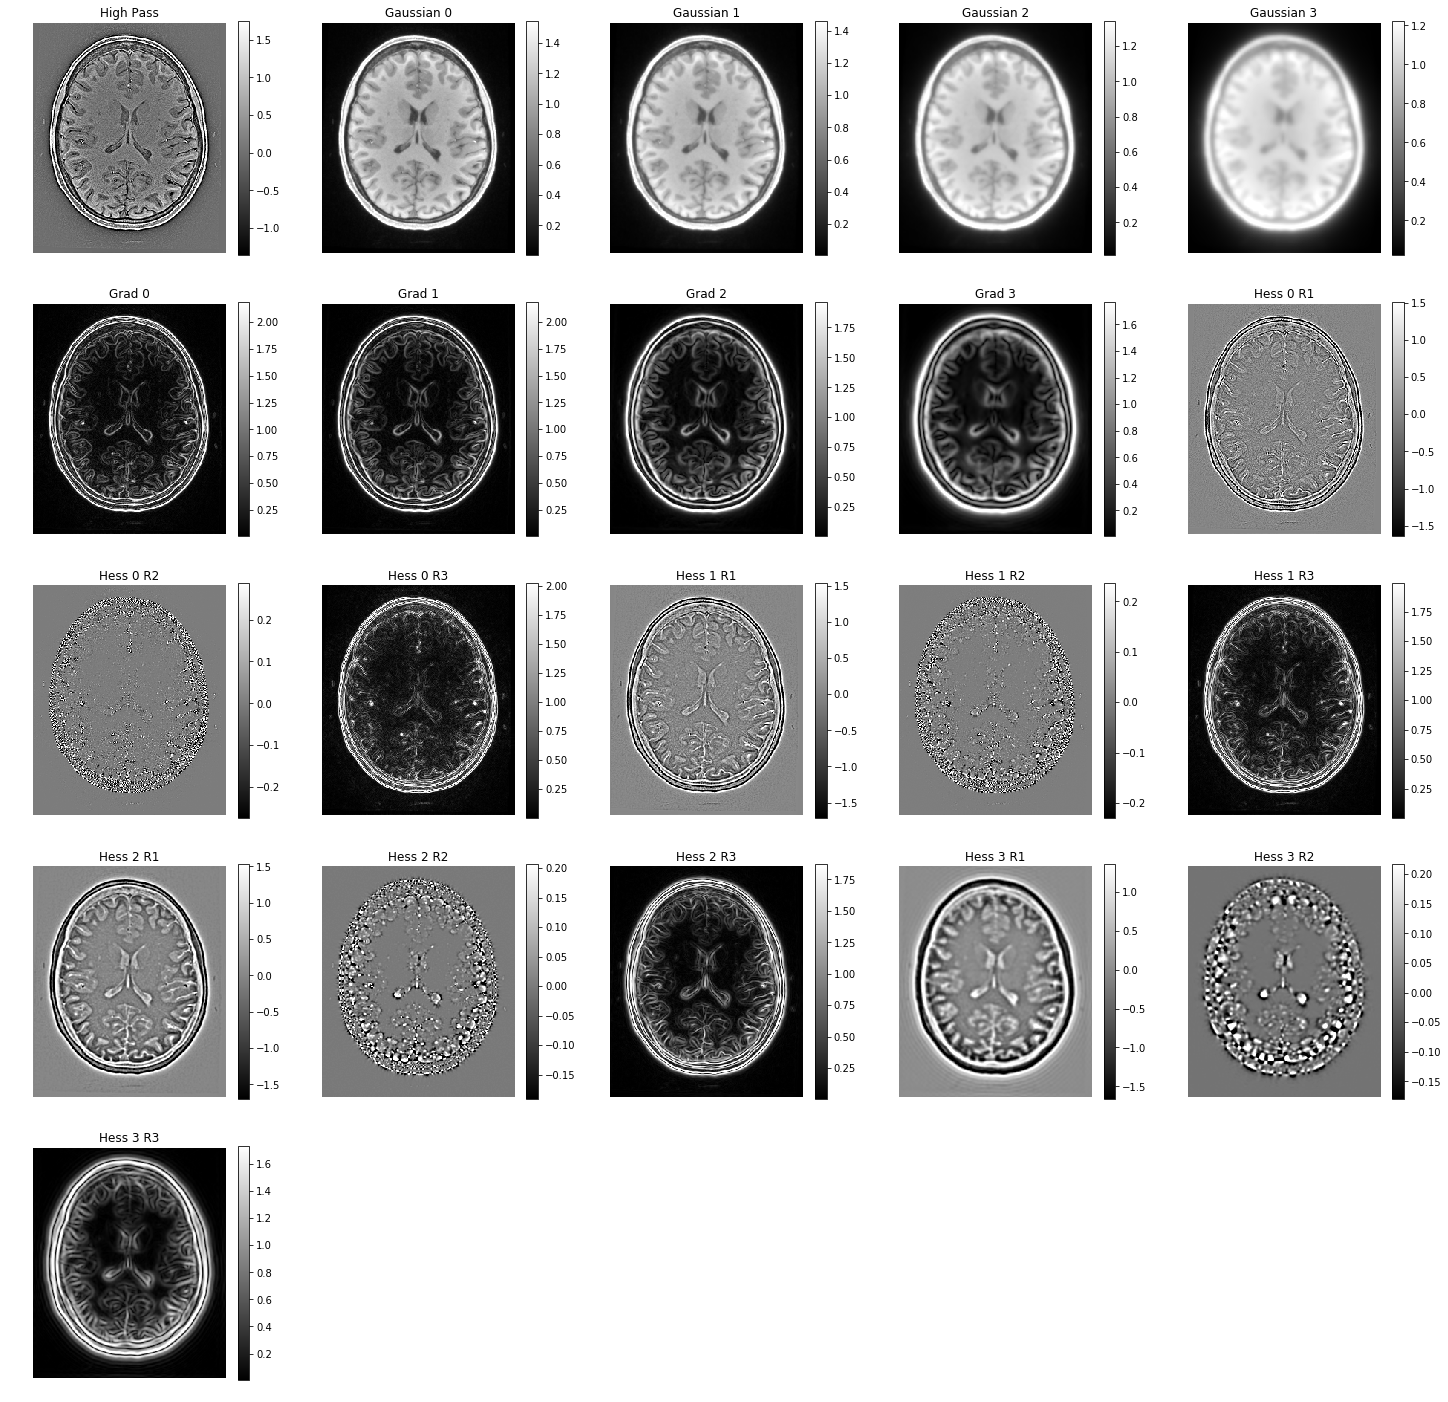

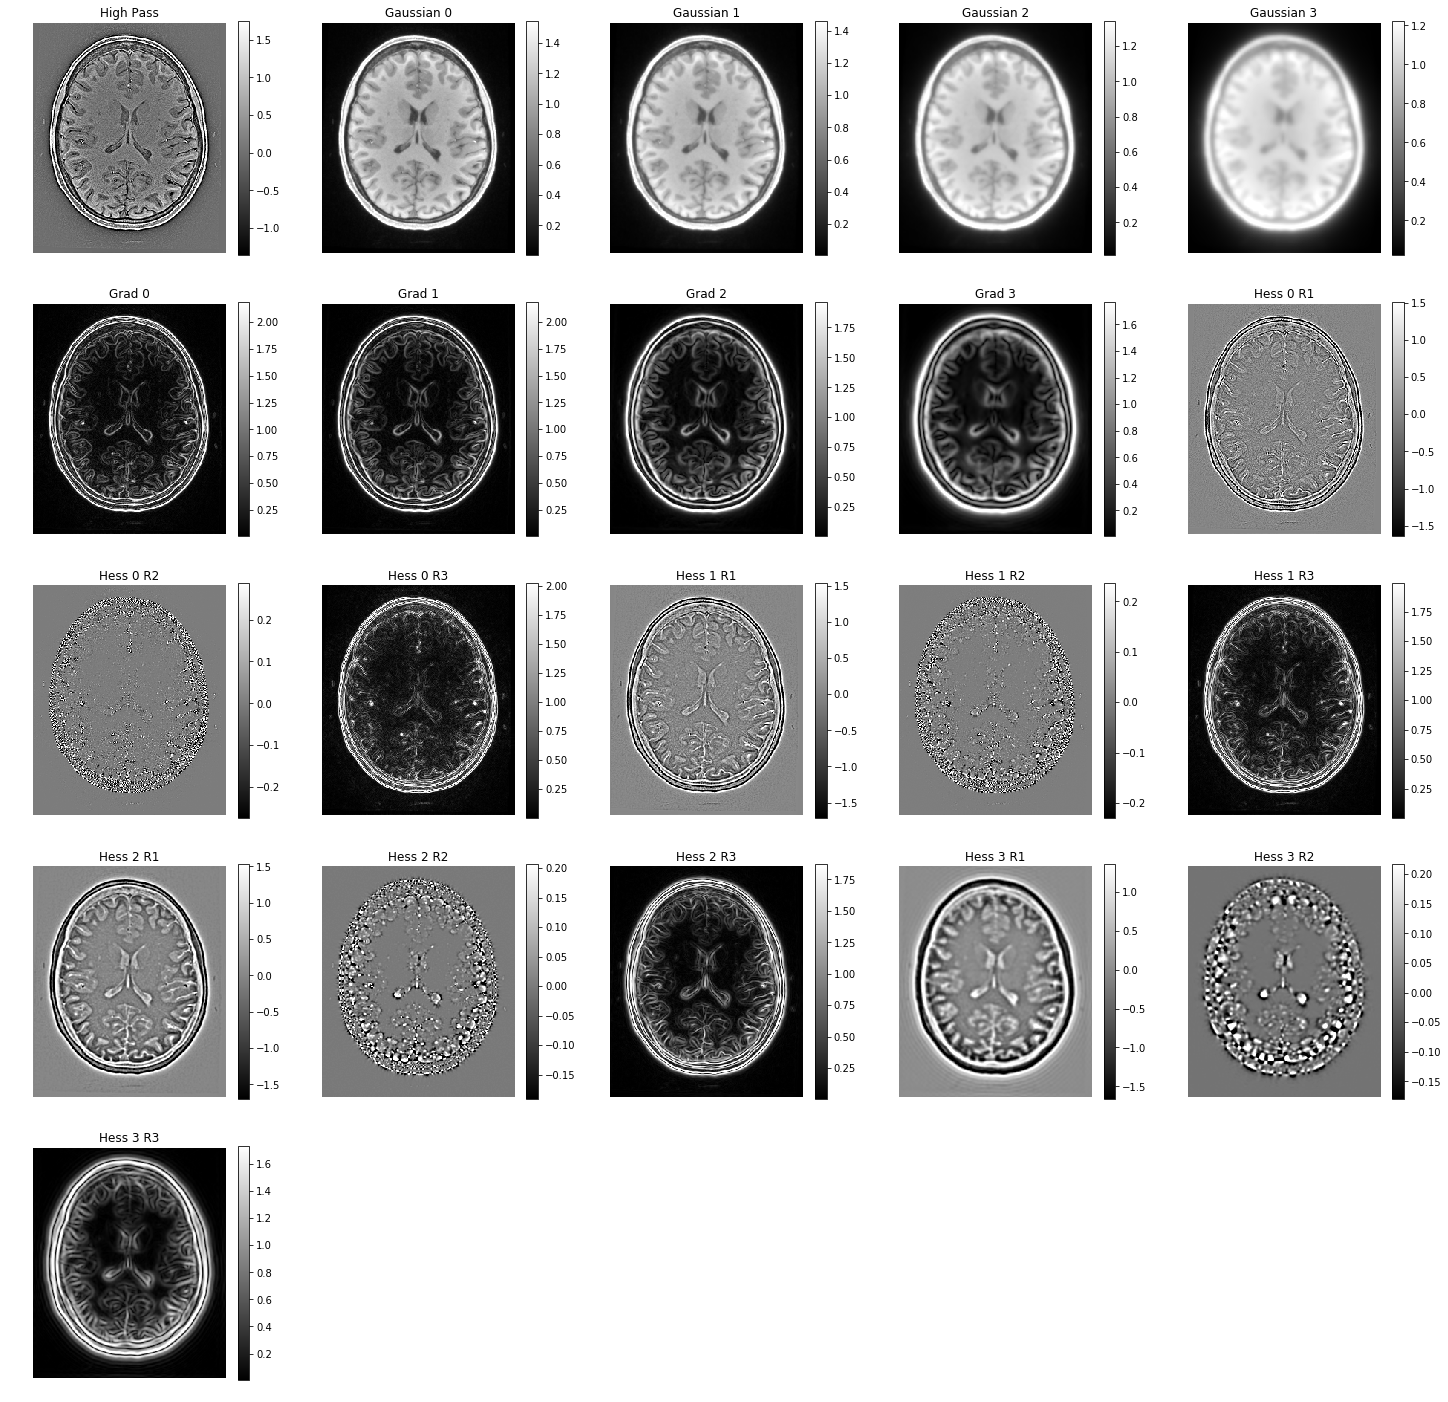

In [44]:

for f in (t1, t2):
    feats, feat_names = textures(t1)
    nfigs = len(feats)
    nrows = ceil(sqrt(nfigs))
    ncols = ceil(nfigs/nrows)

    plt.figure(figsize=[5*ncols,5*nrows])
    for f in range(len(feats)):
        im_show_scale(feats[f], nrows,ncols,f+1, title=feat_names[f])
        